Neste Notebook são abertos dados relativos a imagens de satelite (.nc), conversão desses dados para um formato de dataframe (e divisão desta dataframe em diversas dataframes conforme o dia). Os valores da Temperatura são colocados num formato de Numpy Array (pois queremos que a aplicação do Canny Algorithm seja num Numpy Array).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os

%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa aos ultimos 10 dias dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [2]:
current_path = os.getcwd()
current_path

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks'

In [3]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks\\../data'

In [4]:
nc_path = os.path.join(data_folder, "IBI-2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [5]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(358)

In [6]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
datadf2 = datadf.reset_index()

In [7]:
datadf2 = datadf2.drop(['depth'], axis=1)     #dropar coluna 'depth' (não é necessária pq é sempre igual)
datadf2    #os dados .nc estão agora no formato de uma dataframe

,latitude,time,longitude,thetao
0,35.0,2019-01-01 12:00:00,-19.000000,17.766001
1,35.0,2019-01-01 12:00:00,-18.916666,17.645000
2,35.0,2019-01-01 12:00:00,-18.833334,17.492001
3,35.0,2019-01-01 12:00:00,-18.750000,17.414001
4,35.0,2019-01-01 12:00:00,-18.666666,17.460001
...,...,...,...,...
7320737,45.0,2019-12-24 12:00:00,-5.333334,12.736000
7320738,45.0,2019-12-24 12:00:00,-5.250000,12.770000
7320739,45.0,2019-12-24 12:00:00,-5.166667,13.017000
7320740,45.0,2019-12-24 12:00:00,-5.083334,13.291000


In [8]:
datadf2 = datadf2[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
datadf2

,time,latitude,longitude,thetao
0,2019-01-01 12:00:00,35.0,-19.000000,17.766001
1,2019-01-01 12:00:00,35.0,-18.916666,17.645000
2,2019-01-01 12:00:00,35.0,-18.833334,17.492001
3,2019-01-01 12:00:00,35.0,-18.750000,17.414001
4,2019-01-01 12:00:00,35.0,-18.666666,17.460001
...,...,...,...,...
7320737,2019-12-24 12:00:00,45.0,-5.333334,12.736000
7320738,2019-12-24 12:00:00,45.0,-5.250000,12.770000
7320739,2019-12-24 12:00:00,45.0,-5.166667,13.017000
7320740,2019-12-24 12:00:00,45.0,-5.083334,13.291000


In [9]:
#Para analisarmos os dados relativos ao dia 2019-12-14
dia10 = datadf2[datadf2['time'] == '2019-09-10 12:00:00']
dia10

,time,latitude,longitude,thetao
42588,2019-09-10 12:00:00,35.0,-19.000000,22.594002
42589,2019-09-10 12:00:00,35.0,-18.916666,22.516001
42590,2019-09-10 12:00:00,35.0,-18.833334,22.590000
42591,2019-09-10 12:00:00,35.0,-18.750000,22.754002
42592,2019-09-10 12:00:00,35.0,-18.666666,22.827000
...,...,...,...,...
7302992,2019-09-10 12:00:00,45.0,-5.333334,19.509001
7302993,2019-09-10 12:00:00,45.0,-5.250000,19.473000
7302994,2019-09-10 12:00:00,45.0,-5.166667,19.441000
7302995,2019-09-10 12:00:00,45.0,-5.083334,19.421001


### Plot do Mapa da SST despixilizado

In [10]:
dia10 = dia10.drop(['time'], axis=1)
dia10

,latitude,longitude,thetao
42588,35.0,-19.000000,22.594002
42589,35.0,-18.916666,22.516001
42590,35.0,-18.833334,22.590000
42591,35.0,-18.750000,22.754002
42592,35.0,-18.666666,22.827000
...,...,...,...
7302992,45.0,-5.333334,19.509001
7302993,45.0,-5.250000,19.473000
7302994,45.0,-5.166667,19.441000
7302995,45.0,-5.083334,19.421001


In [11]:
Temp = dia10.pivot_table(index='longitude', columns='latitude', values='thetao').T.values

long_unique = np.sort(dia10['longitude'].unique())
lat_unique = np.sort(dia10['latitude'].unique())
X, Y = np.meshgrid(long_unique, lat_unique)

In [12]:
Temp.shape #por este Temp dentro do Canny

(121, 169)

In [13]:
Temp_10 = pd.DataFrame(Temp).round(5)
Temp_10

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,22.594000,22.516001,22.590000,22.754000,22.827000,22.834000,22.834999,22.836000,22.823000,22.792999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.617001,22.520000,22.555000,22.721001,22.797001,22.804001,22.805000,22.797001,22.766001,22.719000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.641001,22.531000,22.518999,22.681000,22.768999,22.766001,22.757999,22.743000,22.708000,22.648001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.660000,22.555000,22.500999,22.646999,22.750999,22.746000,22.723000,22.681000,22.594000,22.481001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.670000,22.573999,22.493999,22.594999,22.732000,22.737000,22.690001,22.608000,22.482000,22.375999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,19.146000,18.868000,18.583000,18.343000,18.202999,18.184000,18.247000,18.344000,18.431999,18.500000,...,20.441999,20.448000,20.458000,20.468000,20.474001,20.465000,20.427999,20.355000,20.252001,20.131001
117,18.858999,18.613001,18.406000,18.277000,18.250000,18.297001,18.379000,18.458000,18.513000,18.544001,...,20.393999,20.393999,20.393999,20.389999,20.375999,20.337999,20.274000,20.195000,20.110001,20.024000
118,18.608999,18.457001,18.355000,18.323999,18.363001,18.438000,18.503000,18.549999,18.576000,18.586000,...,20.243999,20.226999,20.209000,20.183001,20.146000,20.093000,20.032000,19.969000,19.909000,19.853001
119,18.504000,18.417999,18.395000,18.434000,18.507999,18.570999,18.608999,18.629000,18.639999,18.646999,...,19.990000,19.945999,19.910999,19.870001,19.822001,19.766001,19.712000,19.658001,19.625999,19.611000


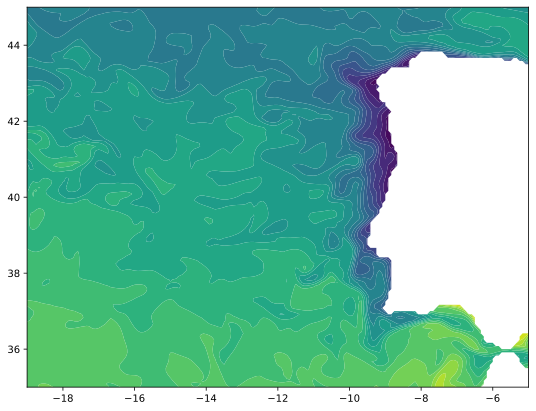

In [87]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.rcParams['figure.figsize'] = 9,7 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
#levels = np.array([-0.4,-0.2,0,0.2,0.4])   #como os valores estão super baixos não aparece as linhas a separarem valores no mapa   
levels = np.array([13, 14, 15, 16, 17, 18, 19, 20])  #permite definir no mapa linhas que separam zonas de diferentes temperaturas

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Temp, 20, cmap=cm.viridis)

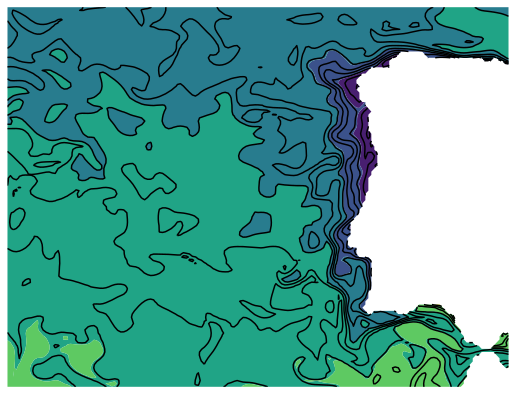

In [174]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.rcParams['figure.figsize'] = 9,7 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])   #como os valores estão super baixos não aparece as linhas a separarem valores no mapa   
#levels = np.array([13, 14, 15, 16, 17, 18, 19, 20])  #permite definir no mapa linhas que separam zonas de diferentes temperaturas

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Temp, len(levels), cmap=cm.viridis)

# Set all level lines to black
#line_colors = ['black' for l in cpf.levels]     

# Make plot and customize axes
cp = ax.contour(X, Y, Temp,  levels=15, colors=line_colors)
#ax.clabel(cp, fontsize=10, colors=line_colors);
plt.axis('off')         #Para remover da imagem os labels com a longitude e latitude
#plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
#plt.title('SST Map 14 December 2019')
 

images_folder = os.path.join(current_path, "../images")
plt.savefig(os.path.join(images_folder, "SST_July10.png"))

### Aplicar Canny Edge Detector a imagem (.png) do dia 14 obtida através do Seaborn

No entanto o meu objectivo não é aplicar o Canny edge detector a imagens (.png), pois ao gravar a imagem eu perco as dimensões verdadeiras da matriz da Temperatura (a imagem fica nomeadamente com 3 dimensões (RGB))

O objetivo é aplicar o Canny a um numpy array que é uma representação dessa imagem.

In [175]:
SST_july10 = cv2.imread(os.path.join(images_folder, "SST_July10.png"))
SST_july10

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [176]:
SST_july10.shape

(504, 648, 3)

In [177]:
x = os.path.join(images_folder, "SST_July14.png")
x

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks\\../images\\SST_July14.png'

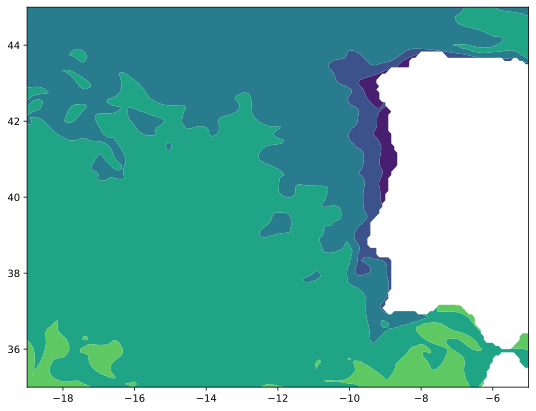

In [178]:
plt.contourf(X,Y,Temp, 5, cmap=cm.viridis)

(array([8.77210e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.23370e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.97500e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.60600e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.97500e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 7.59800e+03, 7.59800e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.60600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.23370e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.60980e+04, 0.00000e+00, 0.00000e+00, 4.97500e+03, 5.23370e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.60980e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

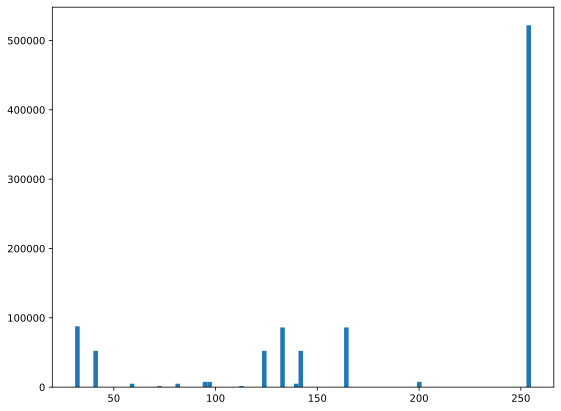

In [146]:
plt.hist(SST_july10.flatten(), bins=100
        )

In [149]:
SST_july10.shape

(504, 648, 3)

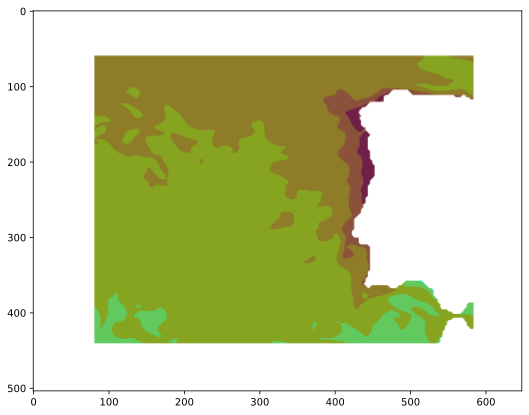

In [143]:
plt.imshow(SST_july10, cmap=cm.viridis)

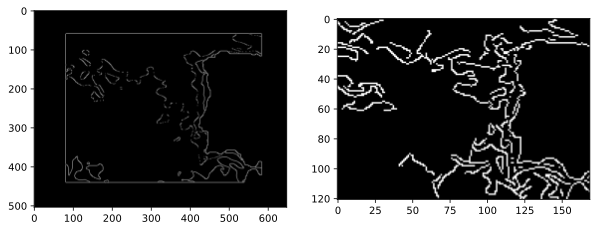

In [160]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
canny = cv2.Canny(SST_july10, 200, 220, L2gradient=False, apertureSize=3)
plt.imshow(canny,"gray")    #'gray'-> parametro para por a preto e branco
plt.subplot(1,2,2)
canny_2 = cv2.Canny(Temp_aux5, 30, 80, L2gradient=False, apertureSize=3)
plt.imshow(canny_2,"gray")    #'gray'-> parametro para por a preto e branco

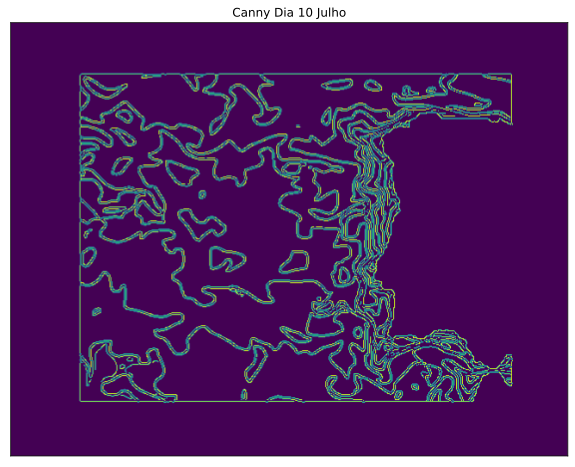

In [179]:
canny = cv2.Canny(SST_july10, 200, 220, L2gradient=False, apertureSize=3)
#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 1 and 7
#If use the Default apertureSize is necessary to apply the blurring manually. If vary the size of the Sobel kernel you don't have to perform blurring yourself.
#L2gradient -> specifies the equation for finding gradient magnitude. L2gradient is of boolean type. Its default value is False

plt.rcParams["figure.figsize"] = (10,8)

plt.imshow(canny)    #'gray'-> parametro para por a preto e branco
plt.title('Canny Dia 10 Julho')
plt.xticks([])
plt.yticks([])
    
plt.show()
#Aplicação do Canny diretamente à imagem previamente guardada

### Aplicar o Canny Algorithm ao numpy array 

Agora vamos aplicar o Canny algorithm no numpy de dimensoes (121, 169) que representa os valores de temperatura

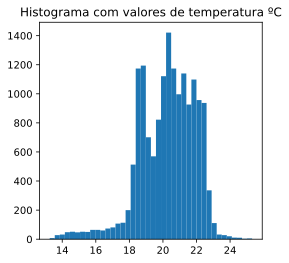

In [20]:
plt.hist(Temp.flatten(), bins=40);
plt.rcParams["figure.figsize"] = 4,4
plt.title('Histograma com valores de temperatura ºC');

#### --------------------------------------------------------------------------------------------------------------
#### Usar um array com o formato uint8 (Valores na gama normal entre 0 e 20)
#### --------------------------------------------------------------------------------------------------------------

In [21]:
Temp_aux = Temp.copy() #criar um numpy auxiliar que é uma cópia do numpy Temp
Temp_aux

array([[22.594002, 22.516   , 22.59    , ...,       nan,       nan,
              nan],
       [22.617   , 22.52    , 22.555   , ...,       nan,       nan,
              nan],
       [22.641   , 22.531   , 22.519001, ...,       nan,       nan,
              nan],
       ...,
       [18.609001, 18.457   , 18.355   , ..., 19.969002, 19.909   ,
        19.853   ],
       [18.504002, 18.418   , 18.395   , ..., 19.658   , 19.626   ,
        19.611   ],
       [18.461   , 18.434   , 18.484001, ..., 19.441   , 19.421001,
        19.421001]], dtype=float32)

In [22]:
Temp_aux.shape

(121, 169)

In [23]:
#Converter o array para o formato uint8
Temp_aux = Temp_aux.astype(np.uint8)

In [24]:
Temp_aux

array([[22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0],
       ...,
       [18, 18, 18, ..., 19, 19, 19],
       [18, 18, 18, ..., 19, 19, 19],
       [18, 18, 18, ..., 19, 19, 19]], dtype=uint8)

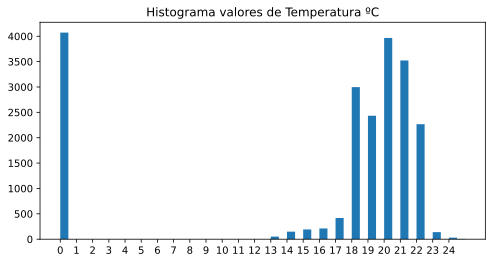

In [28]:
#Para verificarmos que os valores estão de facto entre 0 e 20
plt.hist(Temp_aux.flatten(), bins=50);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title('Histograma valores de Temperatura ºC')
plt.rcParams["figure.figsize"] = 8, 4

In [29]:
Temp_aux = np.flipud(Temp_aux)   #flipud -> Reverse the order of elements along axis 0 (up/down).
Temp_aux

array([[18, 18, 18, ..., 19, 19, 19],
       [18, 18, 18, ..., 19, 19, 19],
       [18, 18, 18, ..., 19, 19, 19],
       ...,
       [22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0],
       [22, 22, 22, ...,  0,  0,  0]], dtype=uint8)

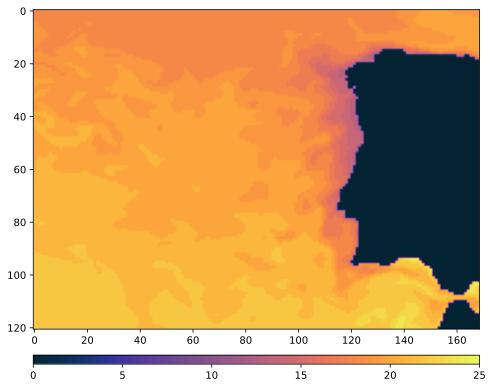

In [31]:
#Plotar o numpy array para ver se de facto corresponde há imagem em causa
import cmocean
im = plt.imshow(Temp_aux, cmocean.cm.thermal)
plt.rcParams["figure.figsize"] = (8,8)
plt.colorbar(im, orientation='horizontal', fraction=0.07, pad=0.06, aspect=50)
plt.show()

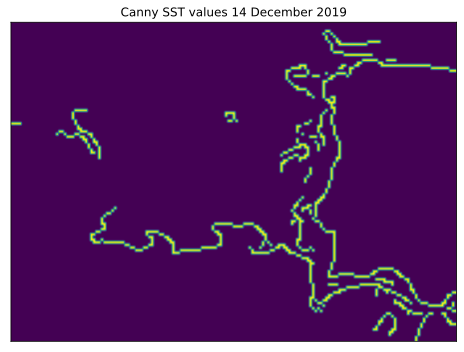

In [34]:
canny = cv2.Canny(Temp_aux, 3, 6, L2gradient=False, apertureSize=3)

plt.rcParams["figure.figsize"] = (8,8)

plt.imshow(canny)    #'gray'-> parametro para por a preto e branco
plt.title('Canny SST values 14 December 2019')
plt.xticks([])
plt.yticks([])
    
plt.show()

#Canny aplicado ao numpy array

#### --------------------------------------------------------------------------------------------------------------
### Usar um array com formato uint8, com valores entre 0 e 255 (MAIS CORRETO)
#### --------------------------------------------------------------------------------------------------------------

In [35]:
# Matriz de temperatura em que os valores estão entre 0 e 255
Temp_aux5 = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')
Temp_aux5

array([[197, 195, 197, ...,   0,   0,   0],
       [197, 195, 196, ...,   0,   0,   0],
       [198, 196, 195, ...,   0,   0,   0],
       ...,
       [113, 110, 107, ..., 142, 140, 139],
       [111, 109, 108, ..., 135, 134, 134],
       [110, 109, 110, ..., 130, 130, 130]], dtype=uint8)

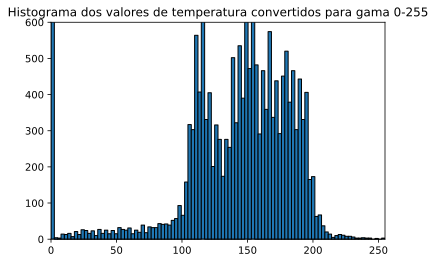

In [37]:
#Para verificarmos que os valores estão de facto entre 0 e 255
plt.hist(Temp_aux5.flatten(), bins=100, edgecolor='black');
plt.title('Histograma dos valores de temperatura convertidos para gama 0-255')
plt.xlim([0, 255])
plt.ylim([0, 600])
plt.rcParams["figure.figsize"] = 6, 4

In [38]:
Temp_aux5 = np.flipud(Temp_aux5)   #flipud -> Reverse the order of elements along axis 0 (up/down).
Temp_aux5

array([[110, 109, 110, ..., 130, 130, 130],
       [111, 109, 108, ..., 135, 134, 134],
       [113, 110, 107, ..., 142, 140, 139],
       ...,
       [198, 196, 195, ...,   0,   0,   0],
       [197, 195, 196, ...,   0,   0,   0],
       [197, 195, 197, ...,   0,   0,   0]], dtype=uint8)

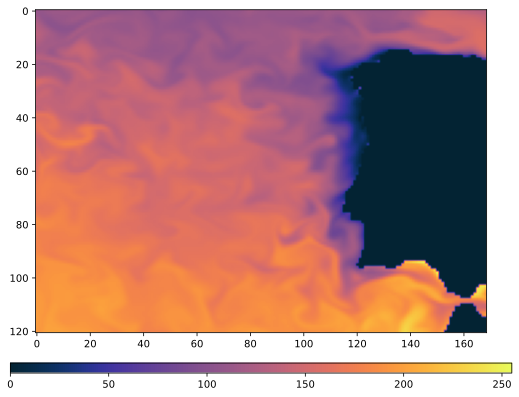

In [163]:
#Plotar o numpy array para ver se de facto corresponde há imagem em causa
im3 = plt.imshow(Temp_aux5, cmocean.cm.thermal)
plt.rcParams["figure.figsize"] = (7,7)
plt.colorbar(im3, orientation='horizontal', fraction=0.07, pad=0.08, aspect=50)
plt.show()

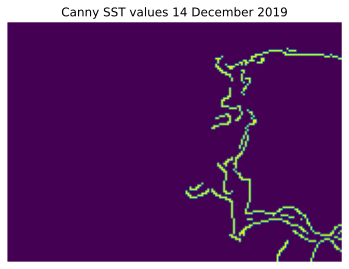

In [77]:
canny3 = cv2.Canny(Temp_aux5, 75, 150, L2gradient=False, apertureSize=3)
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(canny3)    #'gray'-> parametro para por a preto e branco
plt.title('Canny SST values 14 December 2019')
plt.axis('off');    # = plt.xticks([]) plt.yticks([])

Duvida: o problema que esta a surgir é que como convertemos todos os valores do array da temperatura para a gama entre 0 e 255, os valores que eram 0 (terra) estão muito perto dos valores de temperatura mais baixos do oceano o que faz com que por vezes as margens continentais não apareçam bem definidas porque o gradiente de temperatura é demasiado baixo. Não seria importante ver-se sempre as margens continentais ou isso não é particularmente importante????

#### Sobre thresholds
Os thresholds não são aplicados aos valores de intensidade dos pixels da imagem original mas sim ao seu gradiente de magnitude, cujo valor máximo pode ser entre 4 a 6 vezes superior ao valor máximo da intensidade da imagem, pois são estimados usando um Sobel operator. Assim irão deixar de ser vistas edges quando o upper threshold exceder cerca de 1000 e pouco.

Teoricamente o valor máximo que o Sobel Gradient Magnitude pode atingir é 6 vezes o valor da máxima intensidade da imagem original

### Resultados the canny:
    15 May -> lixo (quase não se conseguem detetar edges)
    30 May -> Mau (algumas edges na costa Sul portuguesa)
    10 June -> Medio/Mau (algumas edges mas a costa portuguesa fica mal definida por vezes)
    30 June -> Lixo (quase não se detetam edges)
    July -> bad results
    10 Agosto -> Medio/Mau (algumas edges mas a costa portuguesa fica mal definida por vezes)
    30 Agosto -> Medio (detetam-se edges na costa Sul portuguesa)
    15 Setembro -> médio (detetam-se edges ao longo da costa mas a costa esta mal definida em alguns sitios)
    30 Setembro -> médio (detetam-se varias edges mas a costa esta mal definida em alguns sitios)
    15 Outubro -> médio/mau (detetam-se edges ao longo da costa mas a costa esta mal definida em alguns sitios)
    30 Outubro -> médio/bom (detetam-se edges e a costa encontra-se relativamente bem definida)

# --------------------------------------------------------------------------------------------------------
### Para Interpretação

Nesta célula serão visualizados 4 plots relativos a um dia específico: 2 imagens sujeitas ao canny algorithm com diferentes valores de thresholds (para analisarmos as diferenças), 1 contour da imagem das SST cujos valores de temperaturas estão nas suas gamas corretas e 1 histograma com a dispersão dos valores de temperatura quando convertidos para a gama 0-255. 


In [105]:
canny_300 = []
for line in canny_1:
    print(line)
    canny_300.append(line[line == 0] = np.nan)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-105-638fa19e3b05>, line 4)

In [102]:
def canny_visualization(img, Tmax):
    #image load
    #image conversion to grayscale
    #plot images

In [ ]:
canny_visualization(img, Tmax)

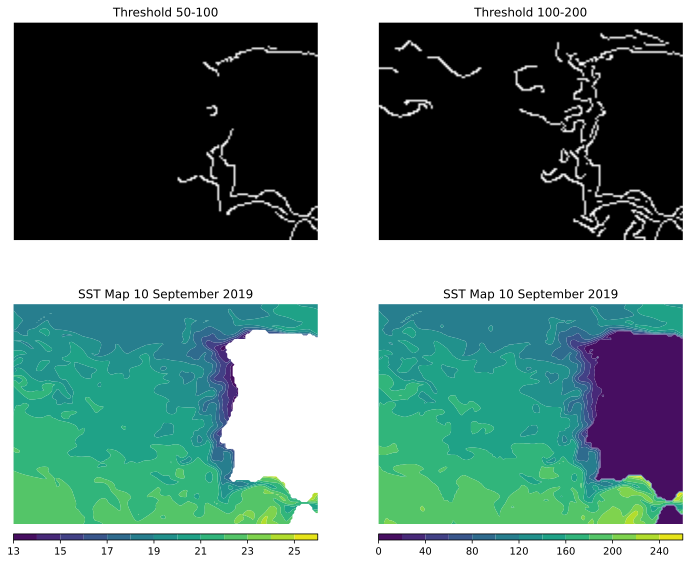

In [129]:
# create figure
fig = plt.figure(figsize=(12, 10))

# setting values to rows and column variables
rows = 2
columns = 2

#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 3 and 7
#L2gradient -> specifies the equation for finding gradient magnitude. L2gradient is of boolean type. Its default value is False

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Definição dos parametros do canny
Tmax = 200
Tmin= Tmax/2

canny_1 = cv2.Canny(Temp_aux5, Tmin, Tmax, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_1, 'gray')
plt.axis('off')
plt.title("Threshold 50-100");

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
Tmax = 100
Tmin= Tmax/2

#Definição dos parametros do canny
canny_2 = cv2.Canny(Temp_aux5, Tmin, Tmax, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_2, 'gray')
plt.axis('off')
plt.title("Threshold 100-200");


# Adds a subplot to show the image

ax = fig.add_subplot(rows, columns, 3)
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(X,Y,Temp, 14, cmap=cm.viridis)
# Make plot and customize axes
#cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)
#ax.clabel(cp, fontsize=10, colors=line_colors);
plt.axis('off');       #Para remover da imagem os labels com a longitude e latitude
plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
plt.title('SST Map 10 September 2019');


# Adds a subplot at tshow um histograma com a dispersão dos valores de temperatura na matriz da imagem
ax=fig.add_subplot(rows, columns, 4)
#Definição dos parametros do canny
cpf = ax.contourf(X,Y,np.flipud(Temp_aux5), 14, cmap=cm.viridis)
plt.axis('off');       #Para remover da imagem os labels com a longitude e latitude
plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
plt.title('SST Map 10 September 2019');


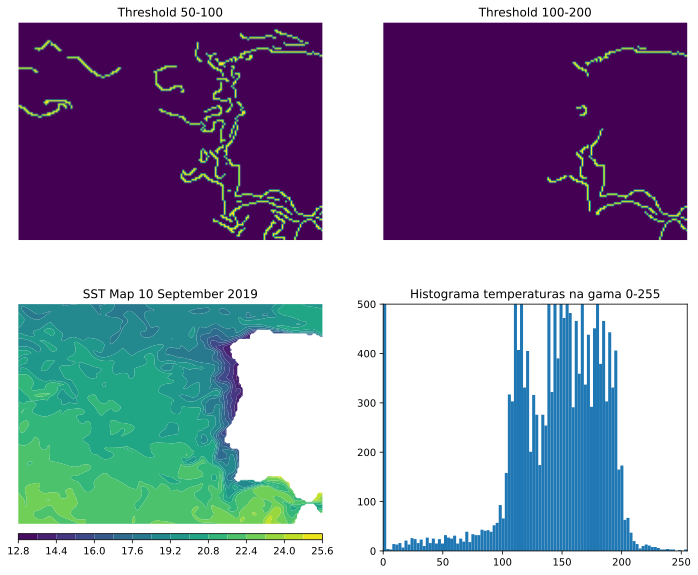

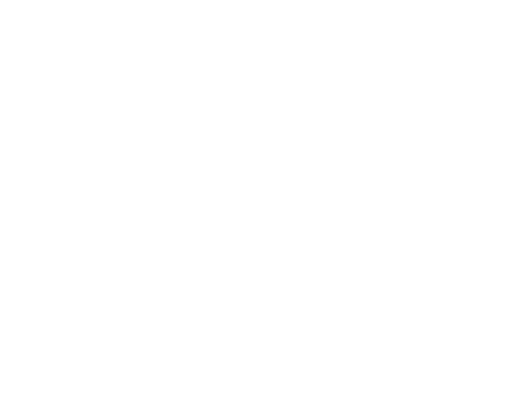

In [97]:
# create figure
fig = plt.figure(figsize=(12, 10))

# setting values to rows and column variables
rows = 2
columns = 2

#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 3 and 7
#L2gradient -> specifies the equation for finding gradient magnitude. L2gradient is of boolean type. Its default value is False

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#Definição dos parametros do canny
canny_1 = cv2.Canny(Temp_aux5, 50, 100, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_1)
plt.axis('off')
plt.title("Threshold 50-100");

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
#Definição dos parametros do canny
canny_2 = cv2.Canny(Temp_aux5, 100, 200, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_2)
plt.axis('off')
plt.title("Threshold 100-200");


# Adds a subplot to show the image

ax = fig.add_subplot(rows, columns, 3)
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(X,Y,Temp, 15, cmap=cm.viridis)
# Make plot and customize axes
#cp = ax.contour(X, Y, Temp,  levels=levels, colors=line_colors)
#ax.clabel(cp, fontsize=10, colors=line_colors);
plt.axis('off');       #Para remover da imagem os labels com a longitude e latitude
plt.colorbar(cpf, orientation='horizontal', fraction=0.07, pad=0.04, aspect=50)
plt.title('SST Map 10 September 2019');


# Adds a subplot at tshow um histograma com a dispersão dos valores de temperatura na matriz da imagem
fig.add_subplot(rows, columns, 4)
#Definição dos parametros do canny
histograma = plt.hist(Temp_aux5.flatten(), bins=100);
plt.xlim([0, 255])
plt.ylim([0, 500])
# showing image
plt.title("Histograma temperaturas na gama 0-255");
plt.show(histograma);
plt.axis('off');


# --------------------------------------------------------------------------------------------
## Otsu Method to choose Threshold values 


In [161]:
def thresholding(f, L):
    #create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    #setting to 0 the pixels bellow the threshold
    f_tr[np.where(f<L)] = 0
    return f_tr

In [162]:
def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        #computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        #computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]
    
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

<BarContainer object of 256 artists>

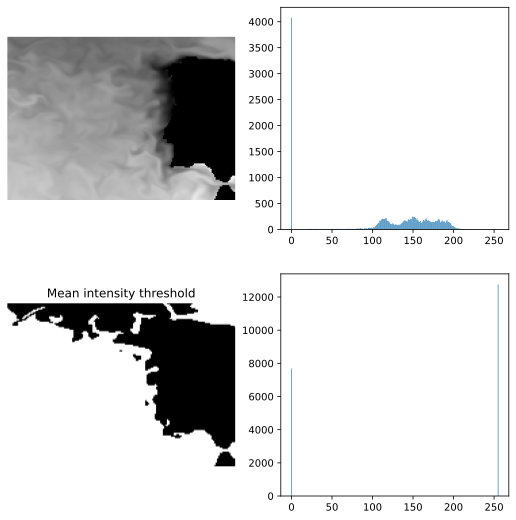

In [168]:
img = Temp_aux5

mean_v = np.mean(img)
img_t = thresholding(img, mean_v)

hist_img,_=np.histogram(img, bins=256, range=(0,256))
hist_t,_ = np.histogram(img_t*255, bins=256, range=(0,256))

plt.figure(figsize=(9,9))
plt.subplot(221); plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(222); plt.bar(np.arange(0,256), hist_img)
plt.subplot(223); plt.imshow(img_t, cmap='gray'); plt.axis('off'); plt.title('Mean intensity threshold')
plt.subplot(224); plt.bar(np.arange(0,256), hist_t)

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------------
### Apply Gaussian Filter previously

No paper de Madagascar eles dizem aplicar um gaussian filter às imagens antes de aplicar o Canny Algorithm (to omit small scale variability)

In [48]:
from scipy.ndimage import gaussian_filter

In [68]:
Temp_gauss = Temp_aux5.copy()
Temp_gauss

array([[110, 109, 110, ..., 130, 130, 130],
       [111, 109, 108, ..., 135, 134, 134],
       [113, 110, 107, ..., 142, 140, 139],
       ...,
       [198, 196, 195, ...,   0,   0,   0],
       [197, 195, 196, ...,   0,   0,   0],
       [197, 195, 197, ...,   0,   0,   0]], dtype=uint8)

In [70]:
Temp_gauss = gaussian_filter(Temp_gauss, sigma=1)
Temp_gauss
#Quando aplico este Gaussian_filter a gama de valores do array passa a estar entre 0-229

array([[109, 109, 109, ..., 132, 131, 131],
       [110, 109, 108, ..., 135, 134, 134],
       [112, 110, 108, ..., 140, 139, 138],
       ...,
       [196, 195, 196, ...,   0,   0,   0],
       [196, 195, 196, ...,   0,   0,   0],
       [196, 196, 196, ...,   0,   0,   0]], dtype=uint8)

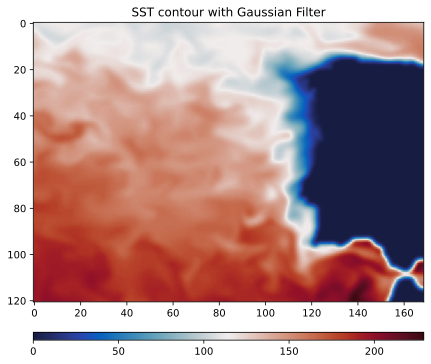

In [52]:
#Plotar o numpy array para ver se de facto corresponde há imagem em causa
im5 = plt.imshow(Temp_gauss, cmocean.cm.balance)
plt.rcParams["figure.figsize"] = (7,7)
plt.colorbar(im5, orientation='horizontal', fraction=0.07, pad=0.08, aspect=50)
plt.title('SST contour with Gaussian Filter')
plt.show()

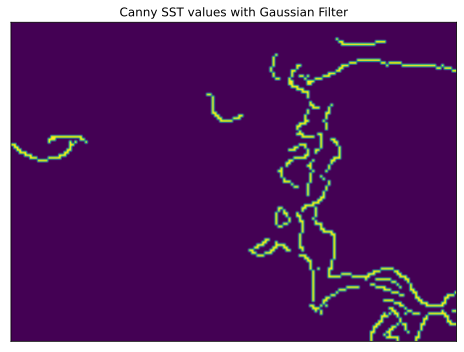

In [56]:
canny7 = cv2.Canny(Temp_gauss, 40, 80, L2gradient=False, apertureSize=3)

plt.rcParams["figure.figsize"] = (8,8)

plt.imshow(canny7)    #'gray'-> parametro para por a preto e branco
plt.title('Canny SST values with Gaussian Filter')
plt.xticks([])
plt.yticks([])
    
plt.show()

#### Mostrar diferença de resultados: Normal vs Prévia aplicação dum Gaussian Filter

Podemos observar as diferenças que surgem nos resultados do canny quando é previamente aplicado um Gaussian Filter ao array.  Gaussian filter is commonly used in image processing for smoothing and reducing noise.

No StackOverflow dizem que se usarmos um apertureSize superior a 3 (5 ou 7) então não é necessário aplicar um Gaussian Blur. Se se usar um apertureSize=3 então é necessário aplicar previamente um Gaussian Blur. Existem algumas fontes que contradizem esta informação.

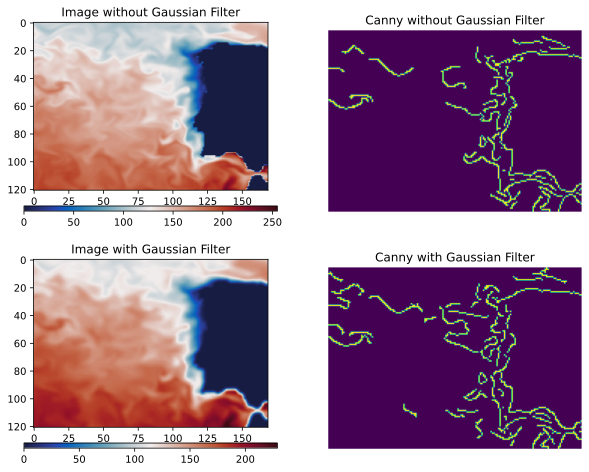

In [82]:
# create figure
fig = plt.figure(figsize=(10, 8))

# setting values to rows and column variables
rows = 2
columns = 2

#apertureSize -> Order of Kernel(matrix) for the Sobel filter. Default value is (3 x 3). value should be odd between 3 and 7
#L2gradient -> specifies the equation for finding gradient magnitude. If True uses a more accurate equation; Default value is False
        # With L2gradient=True the algorithm shows less edges

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
im3 = plt.imshow(Temp_aux5, cmocean.cm.balance);
plt.colorbar(im3, orientation='horizontal', fraction=0.07, pad=0.08, aspect=50);
plt.title('Image without Gaussian Filter');


# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
#Definição dos parametros do canny
canny_2 = cv2.Canny(Temp_aux5, 50, 100, L2gradient=False, apertureSize=3)
# showing image
plt.imshow(canny_2)
plt.axis('off');
plt.title("Canny without Gaussian Filter");


# Adds a subplot to show the image
ax = fig.add_subplot(rows, columns, 3)
im5 = plt.imshow(Temp_gauss, cmocean.cm.balance)
plt.colorbar(im5, orientation='horizontal', fraction=0.07, pad=0.08, aspect=50)
plt.title('Image with Gaussian Filter');

# Adds a subplot at tshow um histograma com a dispersão dos valores de temperatura na matriz da imagem
fig.add_subplot(rows, columns, 4)
#Definição dos parametros do canny
canny7 = cv2.Canny(Temp_gauss, 30, 60, L2gradient=False, apertureSize=3)
plt.imshow(canny7)    #'gray'-> parametro para por a preto e branco
plt.axis('off');
plt.title('Canny with Gaussian Filter');


# ------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------
### Tentar compreender a que valores de temperatura verdadeiros correspondem os valores da gama 0-255

In [58]:
Temperatura_real = Temp.copy()
Temperatura_real

array([[22.594002, 22.516   , 22.59    , ...,       nan,       nan,
              nan],
       [22.617   , 22.52    , 22.555   , ...,       nan,       nan,
              nan],
       [22.641   , 22.531   , 22.519001, ...,       nan,       nan,
              nan],
       ...,
       [18.609001, 18.457   , 18.355   , ..., 19.969002, 19.909   ,
        19.853   ],
       [18.504002, 18.418   , 18.395   , ..., 19.658   , 19.626   ,
        19.611   ],
       [18.461   , 18.434   , 18.484001, ..., 19.441   , 19.421001,
        19.421001]], dtype=float32)

In [59]:
#converter os NaN values to zero
Temperatura_real = np.where(np.isnan(Temperatura_real), 0, Temperatura_real)
Temperatura_real

array([[22.594002, 22.516   , 22.59    , ...,  0.      ,  0.      ,
         0.      ],
       [22.617   , 22.52    , 22.555   , ...,  0.      ,  0.      ,
         0.      ],
       [22.641   , 22.531   , 22.519001, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [18.609001, 18.457   , 18.355   , ..., 19.969002, 19.909   ,
        19.853   ],
       [18.504002, 18.418   , 18.395   , ..., 19.658   , 19.626   ,
        19.611   ],
       [18.461   , 18.434   , 18.484001, ..., 19.441   , 19.421001,
        19.421001]], dtype=float32)

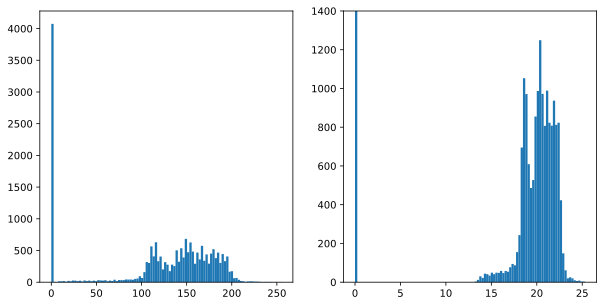

In [63]:
fig, ax = plt.subplots(1, 2)
plt.ylim([0, 1400])
ax[0].hist(Temp_aux5.flatten(), bins=100);
ax[1].hist(Temperatura_real.flatten(), bins=100);
#plt.xlim([2, 255])
#plt.ylim([0, 1400])
plt.rcParams["figure.figsize"] = 10, 5

DUVIDA: Dificuldade em conseguir relacionar os 2 histogramas.

# ---------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------
### Código para que dada uma dataframe, esta seja dividida em várias dataframes consoante a data

Os dados que eu vou extrair do satelite serão referentes a vários dias diferentes portanto para facilitar o posterior processamento dos dados, esta função vai me permitir dividir a dataframe original em diversas dataframes conforme a data

In [ ]:
datadf2

In [ ]:
#converter a coluna time para string (pode simplificar)
datadf2['time']=datadf2['time'].astype(str)

In [ ]:
#Criar uma lista com as diferentes datas
unique_dates = datadf2['time'].unique()
list_dates = list(unique_dates)
list_dates

In [ ]:
n_unique = datadf2['time'].nunique()
n_unique    #nº de datas diferentes que há na dataframe

In [ ]:
splits = list(datadf2.groupby("time"))   # divide a dataframe de acordo com a coluna 'time' e agrupa a informação numa lista

In [ ]:
d = {}
for i in range(n_unique):
    for time in list_dates:
        d[time] = pd.DataFrame(splits[i][1])

In [ ]:
d

In [ ]:
for key in d.keys():
    d[key] = datadf2[:][datadf2.time == key]

In [ ]:
d['2019-07-14 12:00:00']  

In [ ]:
d['2019-07-14 12:00:00'].info()    #trata-se duma dataframe

# ----------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------
### Transformar as coordenadas (longitude e latitude) numa tupple de Pixels (x,y)

In [ ]:
#Criar 2 novas colunas X e Y que sejam os pixels correspondentes

lons = dia10["longitude"].astype("float32").unique()
lats = dia10["latitude"].astype("float32").unique()
lons.sort()
lats.sort()
def get_pixels(lons, lats):
    pixels = {}
    for x, lon in enumerate(lons):
        for y, lat in enumerate(lats):
            pixels[(lon, lat)] = (x, y)
    return pixels
def get_x(lon, lat, pixels):
    return pixels[(lon, lat)][0]
def get_y(lon, lat, pixels):
    return pixels[(lon, lat)][1]
pixels = get_pixels(lons, lats)
dia10["x"] = dia10.apply(lambda row: get_x(row["longitude"], row["latitude"], pixels), axis=1)
dia10["y"] = dia10.apply(lambda row: get_y(row["longitude"], row["latitude"], pixels), axis=1)

In [ ]:
#Converter as colunas x e y para uma nova coluna no formato de tupple
dia10['Pixels'] = dia10[['x', 'y']].apply(tuple, axis=1)

In [ ]:
dia10

# --------------------------------------------------------------------------------------

A fazer: 

    * Testar fazer a sobreposição das imagens com o canny
    * Ler os papers para perceber como é que eles escolhem os thresholds e porquê. E tentar compreender o significado fisico do threshold
    * Converter a imagem RGB para Grayscale e visualizar os resultados do Canny de ambas
    * Criar uma função para o Canny Visualization
    * Tentar converter os zeros para Null Values na imagem e ver o que se obtem --> Canny não aceita Null Values pois os arrays tem de estar no formato uint8 e esse formato nao permite Null Values